In [4]:
from pathlib import Path
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)

input_path = r'D:\Github\Forked\crypto_technical_analysis\files\crypto_data_with_indicators.parquet'

dados = pd.read_parquet(input_path)

display(dados.head(3))

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Symbol,Date,ema_12,ema_26,ema_50,ema_100,ema_200,ema_12_above_ema_26,ema_12_above_ema_50,ema_12_above_ema_100,ema_12_above_ema_200,target_10_7d,bl_target_10_7d,target_10_15d,bl_target_10_15d,target_10_30d,bl_target_10_30d,target_15_7d,bl_target_15_7d,target_15_15d,bl_target_15_15d,target_15_30d,bl_target_15_30d,target_20_7d,bl_target_20_7d,target_20_15d,bl_target_20_15d,target_20_30d,bl_target_20_30d,target_25_7d,bl_target_25_7d,target_25_15d,bl_target_25_15d,target_25_30d,bl_target_25_30d,vl_adx,vl_dmp,vl_dmn,nm_adx_trend,rsi,vl_macd,vl_macd_signal,vl_macd_delta,qt_days_macd_delta_positive
0,0.007470,0.007741,0.004447,0.004909,17877772,0.0,0.0,1CAT-USD,2023-12-20 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,False,False,False,False,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,0
1,0.004910,0.007222,0.004046,0.005551,14832067,0.0,0.0,1CAT-USD,2023-12-21 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,False,False,False,False,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,0
2,0.005538,0.006355,0.005210,0.006131,6806635,0.0,0.0,1CAT-USD,2023-12-22 21:00:00-03:00,NaN,NaN,NaN,NaN,NaN,False,False,False,False,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,0,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN,0


In [5]:
def data_clean(dados:pd.DataFrame, target_list:list, data_return:str):
    # Removing NA
    dados_treat = dados.dropna()

    # Substituindo valores infinitos por NaN
    dados_treat.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Removendo linhas com valores NaN
    dados_treat.dropna(inplace=True)

    # Removing symbol and date columns
    removing_cols = ['Symbol', 'Date']

    # Define the target in a list of target (for futher iteration)
    dados_y = dados_treat[target_list]

    # Removing target from base to avoid data leakage
    dados_x = dados_treat.drop(dados_treat[target_list], axis=1)
    dados_x = dados_treat.drop(dados_treat[removing_cols], axis=1)

    if data_return == 'Y':
        return dados_y
    else:
        return dados_x

In [6]:
def get_target(dados_y:pd.DataFrame, col_target:str):
    return dados_y[col_target]

In [7]:

import preprocessing_data as preprocessing

target_list_bol =   [
    # boleanos
    'bl_target_10_7d','bl_target_15_7d','bl_target_20_7d','bl_target_25_7d',
    'bl_target_10_15d','bl_target_15_15d','bl_target_20_15d','bl_target_25_15d', 
    'bl_target_10_30d','bl_target_15_30d','bl_target_20_30d','bl_target_25_30d' 
]

target_list_val =   [
    # percentual
    'target_10_7d','target_15_7d','target_20_7d','target_25_7d',
    'target_10_15d','target_15_15d','target_20_15d','target_25_15d', 
    'target_10_30d','target_15_30d','target_20_30d','target_25_30d', 
]

remove_target_list = target_list_bol + target_list_val

dados_x = data_clean(dados, remove_target_list, 'X')
dados_y_all = data_clean(dados, remove_target_list, 'Y')

C:\Users\mathe\AppData\Local\Temp\ipykernel_1892\2675581665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_treat.replace([np.inf, -np.inf], np.nan, inplace=True)
C:\Users\mathe\AppData\Local\Temp\ipykernel_1892\2675581665.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_treat.dropna(inplace=True)
C:\Users\mathe\AppData\Local\Temp\ipykernel_1892\2675581665.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_tre

In [8]:
dados_y = get_target(dados_y_all, target_list_bol[0])

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [11]:
def split_data(dados_x:pd.DataFrame, dados_y:pd.DataFrame, test_size:float=0.3):

    # Getting dummies values. This way we can use categorical columns to train the models
    dummies = pd.get_dummies(dados_x)

    # Transform the data in numpy arrays
    X = np.array(dummies.values)
    y = np.array(dados_y.values)

    # This function returns X_train, X_test, y_train, y_test, in this order.
    # See below an example of the return 
    # X_train, X_test, y_train, y_test = split_data(dados_x, dados_y, 0.3)

    return train_test_split(X, y, test_size=0.3, random_state=45)

X_train, X_test, y_train, y_test = split_data(dados_x, dados_y, 0.3)

In [14]:
def norm_scale(X_norm_scale):

    # normalizando e padronizando os dados
    # MinMaxScaler é usado para normalizar as variáveis, e StandardScaler é usado para padronizar
    from sklearn.preprocessing import MinMaxScaler, StandardScaler

    # normalizando
    scaler = MinMaxScaler()
    scaler.fit(X_norm_scale)
    normalized_data = scaler.transform(X_norm_scale)
    # print(normalized_data)

    # Padronizando
    scaler = StandardScaler()
    scaler.fit(X_norm_scale)
    standardized_data = scaler.transform(X_norm_scale)
    # print(standardized_data)

    # print(standardized_data.shape)

    X_norm_scale = standardized_data
    
    return X_norm_scale

In [15]:
# Normalizando datasets de treino e teste
norm_scale(X_train)
norm_scale(X_test)

Normalizando e Padronizando dados
Normalizando e Padronizando dados


array([[-0.07638065, -0.07578412, -0.07628879, ...,  1.0967183 ,
        -0.29897095, -0.11303286],
       [-0.07646045, -0.07584724, -0.07636956, ..., -0.91181117,
         3.34480662, -0.11303286],
       [-0.07644232, -0.07584621, -0.07634909, ...,  1.0967183 ,
        -0.29897095, -0.11303286],
       ...,
       [-0.07646589, -0.07586989, -0.07637343, ..., -0.91181117,
        -0.29897095, -0.11303286],
       [-0.07644084, -0.07584594, -0.07634857, ..., -0.91181117,
        -0.29897095, -0.11303286],
       [-0.07643894, -0.07584352, -0.07634652, ...,  1.0967183 ,
        -0.29897095, -0.11303286]])

In [16]:
# Criando o modelo
model = LogisticRegression(random_state=0,max_iter=1000)

# Treinando o modelo
model.fit(X_train, y_train)

clf = LogisticRegression(random_state=45,max_iter=1000).fit(X_train, y_train)

In [29]:
def eval_model(classifier, X_test, y_test):

    from sklearn.metrics import confusion_matrix
    from sklearn import metrics

    # Fazendo a previsão das classes
    y_pred2 = clf.predict(X_test)

    # Avaliando o erro
    print('Confusion Matrix')
    print(confusion_matrix(y_test,y_pred2))

    # Avaliando o modelo 
    # score = model.score(X_test, y_test)
    score = metrics.accuracy_score(y_test, y_pred2)

    # Percentagem de acerto
    print('Acurácia:', score)

In [30]:
eval_model(clf, X_test, y_test)

Confusion Matrix
[[169191     69]
 [ 48026     70]]
Acurácia: 0.7787270652754007


In [31]:
# Usando o modelo para previsão
predictions = model.predict(X_test)
print(predictions)

[0 0 0 ... 0 0 0]


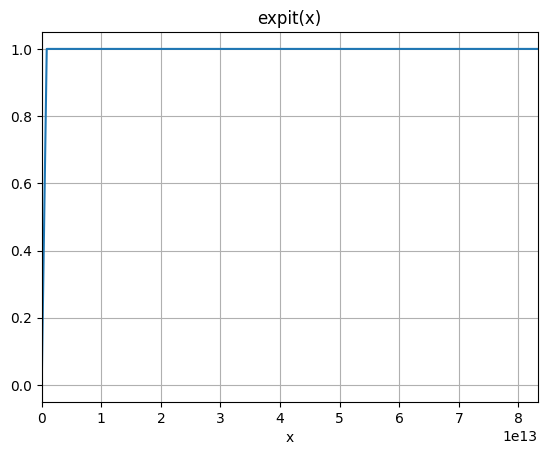

In [32]:
# Visualizando o gráfico

import matplotlib.pyplot as plt
from scipy.special import expit

x = np.linspace(X_train.min(), X_train.max(), 100)
y = expit(x)
plt.plot(x, y)
plt.grid()
plt.xlim(X_train.min(), X_train.max())
plt.xlabel('x')
plt.title('expit(x)')
plt.show()

In [33]:
# Comparando a previsão com o valor real
print('O valor de y teste é:')
print(y_test)

print('O valor do y_pred é:')
print(predictions)

O valor de y teste é:
[0 1 0 ... 0 0 0]
O valor do y_pred é:
[0 0 0 ... 0 0 0]


In [37]:
# Fazendo a previsão das probabilidades
proba = clf.predict_proba(X_test)

# Probabilidade de ser o target:
proba_target = proba[:,1]

list(proba_target)

[0.20316690208264557,
 0.2579999574900652,
 0.2598328005283074,
 0.3113900074511552,
 0.20953639745258884,
 0.24224023785132448,
 0.2619973204776736,
 0.32935316106396206,
 0.29057782647814323,
 0.2574580185882134,
 0.3200403070972988,
 0.19084792962866617,
 0.24527284437355334,
 0.1849153975400308,
 0.2595117443179987,
 0.3164252899413081,
 0.24890207734471761,
 0.19976881774820635,
 0.2902918577369625,
 0.31978184818169936,
 0.3033003814607681,
 0.33736175733772256,
 0.28729968996581123,
 0.22467092588790935,
 0.24351407097856045,
 0.2105292639394737,
 0.24830112136875085,
 0.30973577760225873,
 0.25834948239732597,
 0.23567775396876844,
 0.20732569707736112,
 0.3109128798535069,
 0.27091092402067996,
 0.19421356661275568,
 0.25769385555496593,
 0.28884718200599785,
 0.26971609319955137,
 0.11569931940861451,
 0.25800767708585953,
 0.2503282287730739,
 0.22679334404789048,
 0.33573004918444677,
 0.2909594483182418,
 0.3158579185541721,
 0.2653540849007744,
 0.35654996488732665,
 0.22

In [44]:
def save_model(classifier, name_model:str):
    # Lib to save the model in a compressed way
    import joblib

    # Save the model that has been trained
    joblib.dump(classifier, name_model + '.joblib')

    print(f'Modelo savo no diretório atual com o nome de {name_model}.joblib')

In [41]:
def load_model(name_model:str):
    # Lib to save the model in a compressed way
    import joblib

    # Load the trained model
    clf_loaded = joblib.load(name_model + '.joblib')

    return clf_loaded

In [46]:
save_model(clf, 'logistic_regression_model_bl_target_10_7d')

Modelo savo no diretório atual com o nome de logistic_regression_model_bl_target_10_7d.joblib


## Adjust dataset for Production (ainda em testes)

In [73]:
# from datetime import datetime
# from pathlib import Path
# import pyarrow.parquet as pq
# import pyarrow as pa

import json
import requests as re
import yfinance as yf
import pandas as pd


def get_kucoin_symbols():
    resp = re.get('https://api.kucoin.com/api/v2/symbols')
    ticker_list = json.loads(resp.content)
    symbols_list = [ticker['symbol'] for ticker in ticker_list['data'] if str(ticker['symbol'][-4:]) == 'USDT']
    return symbols_list

def fetch_crypto_data(symbols, start_date):
    df_list = []

    for count, symbol in enumerate(symbols):
        print(f'Processing {symbol} ({count + 1} of {len(symbols)})')

        # Get historical data using yfinance for the given symbol since start_date
        crypto_data = yf.Ticker(symbol).history(start=start_date)

        # Add a 'symbol' column to the DataFrame to identify the cryptocurrency
        crypto_data['Symbol'] = symbol

        # Append the DataFrame to the list if it's not empty
        if not crypto_data.empty:
            df_list.append(crypto_data)

    # Concatenate the list of DataFrames into a single DataFrame
    if df_list:
        return pd.concat(df_list)
    else:
        return None
    

data_hoje = pd.Timestamp.today()

# Formatando a data no formato 'YYYY-MM-DD'
data_hoje_formatada = data_hoje.strftime('%Y-%m-%d')

crypto_symbols = [symbol[:-1] for symbol in kucoin_symbols]

crypto_today = fetch_crypto_data(crypto_symbols, data_hoje_formatada)

'2024-07-09'

In [ ]:

from indicators_util import add_indicators

# Add indicators to the DataFrame
indicators_dataframe = add_indicators(crypto_today)

In [ ]:
target_list_bol =   [
    # boleanos
    'bl_target_10_7d','bl_target_15_7d','bl_target_20_7d','bl_target_25_7d',
    'bl_target_10_15d','bl_target_15_15d','bl_target_20_15d','bl_target_25_15d', 
    'bl_target_10_30d','bl_target_15_30d','bl_target_20_30d','bl_target_25_30d' 
]

target_list_val =   [
    # percentual
    'target_10_7d','target_15_7d','target_20_7d','target_25_7d',
    'target_10_15d','target_15_15d','target_20_15d','target_25_15d', 
    'target_10_30d','target_15_30d','target_20_30d','target_25_30d', 
]

remove_target_list = target_list_bol + target_list_val

dados_x_today = data_clean(indicators_dataframe, remove_target_list, 'X')
dados_y_all_today = data_clean(indicators_dataframe, remove_target_list, 'Y')

# Getting dummies values. This way we can use categorical columns to train the models
dummies_today = pd.get_dummies(dados_x_today)

for target_eval in target_list_bol:

    # dados_y = get_target(dados_y_all_today, target_eval)

    # Fazendo a previsão das probabilidades
    proba = clf.predict_proba(dummies_today)

    # Probabilidade de ser o target:
    proba_target = proba[:,1]

    list(proba_target)
